# 404 PCA在特征脸以及3D中的应用

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people()

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
faces.data.shape

(13233, 2914)

In [5]:
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

In [6]:
faces.images.shape

(13233, 62, 47)

In [7]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

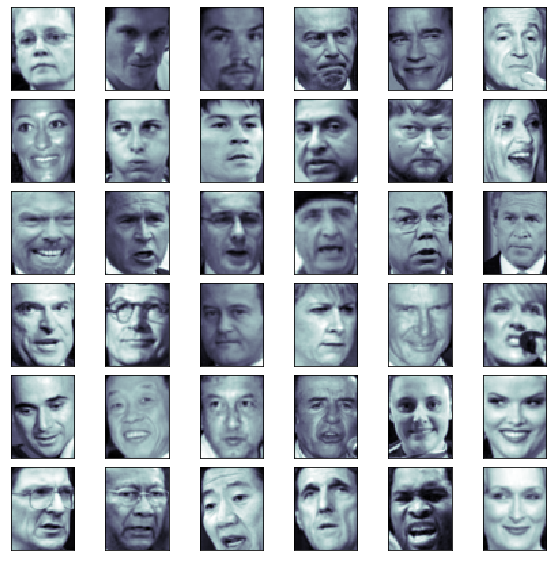

In [8]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

### 特征脸

In [9]:
%%time
from sklearn.decomposition import PCA 
pca = PCA(svd_solver='randomized')
pca.fit(X)

Wall time: 24.7 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

In [10]:
pca.components_.shape

(2914, 2914)

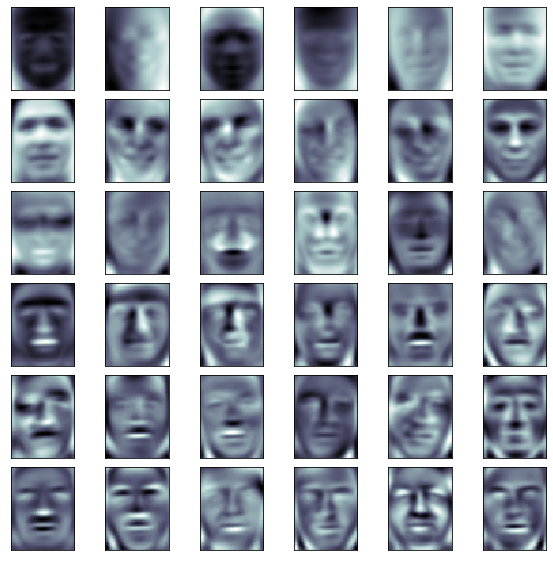

In [11]:
plot_faces(pca.components_[:36,:])

### 更多关于lfw_people数据集

In [12]:
faces2 = fetch_lfw_people(min_faces_per_person=60)

In [13]:
faces2.data.shape

(1348, 2914)

In [14]:
faces2.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [15]:
len(faces2.target_names)

8

## 可视化三维样本数据点的PCA过程

In [16]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [17]:
# 在三维空间随机生成100个样本点
np.random.seed(8888)
X_random = np.random.random(size=(100,3))

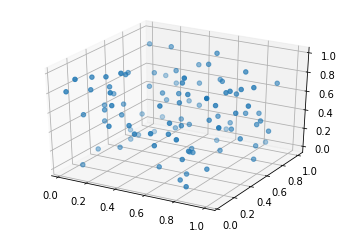

In [18]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_random[:,0],X_random[:,1],X_random[:,2])
plt.show()

### demean

In [19]:
def demean(X):
    return X - np.mean(X, axis=0)

X_demean = demean(X_random)

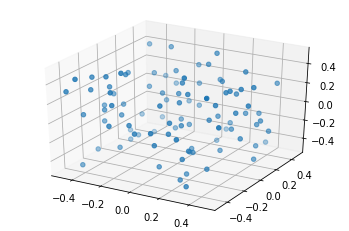

In [20]:
ax = plt.axes(projection='3d')
ax.scatter3D(X_demean[:,0], X_demean[:,1], X_demean[:,2])
plt.show()

### PCA

In [21]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [24]:
initial_w = np.random.random(X_demean.shape[1])
eta = 0.01
w1 = first_component(X_demean, initial_w, eta) 
w1 # 求出第一主成分

array([ 0.82846908,  0.35703346, -0.43146969])

In [25]:
# 将原来的所有样本点X去除在第一主成分上的分量，得到X2
X2 = np.empty(X_demean.shape)
#for i in range(len(X)):
#    X2[i] = X[i] - X[i].dot(w1) * w1
X2 = X_demean - X_demean.dot(w1).reshape(-1,1) * w1

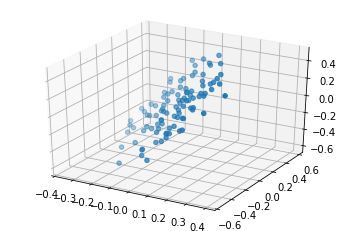

In [26]:
# 绘制X2，此时，X2的所有样本点分布在一个平面上
ax = plt.axes(projection='3d')
ax.scatter3D(X2[:,0], X2[:,1], X2[:,2])
plt.show()

In [27]:
w2 = first_component(X2, initial_w, eta)
w2 # 求出第二主成分

array([-0.02267193,  0.7911843 ,  0.61115741])

In [28]:
# 将X2去除在第二主成分上的分量，得到X3
X3 = np.empty(X2.shape)
#for i in range(len(X)):
 #   X3[i] = X2[i] - X2[i].dot(w2) * w2
X3 = X2 - X2.dot(w2).reshape(-1,1) * w2

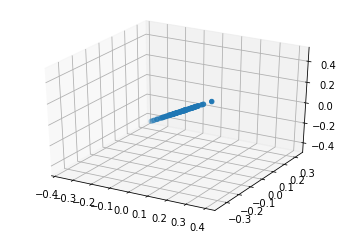

In [29]:
# 绘制X3，此时，X3的所有样本点分布在一条直线上
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:,0], X3[:,1], X3[:,2])
plt.show()